In [15]:
from values import *
from utils import *
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy.spatial.distance import cdist
from scipy.linalg import cholesky
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
N_t = np.floor(25/ a_t).astype(np.int64)
N_z = len(z_values) 
print(f'number of grid in x :{N_t}, z:{N_z}, total:{N_t**2*N_z}')


number of grid in x :65, z:236, total:997100


In [46]:
x = np.arange(N_t)* a_t 
y = np.arange(N_t)* a_t 
X, Y = np.meshgrid(x, y)
V_0000 = np.zeros((N_t, N_t, N_z))
V_1000 = np.zeros((N_t, N_t, N_z))


In [47]:
points = np.column_stack([X.ravel(), Y.ravel()]) # linearlized points 

exp_cov = cdist(points, points, 'sqeuclidean')
exp_cov = np.exp(-exp_cov/4/l_t**2)

c1 = lambda z: (E_G*a_t)**2 * n(z)*(1-n(z))/(4*np.pi*l_t**2)* exp_cov


Compare with 3 min 40 sec 

In [48]:
for i,z in enumerate(z_values):
    C_joint = c1(z)
    mean = np.zeros(C_joint.shape[0])  # Zero mean
    L = cholesky(C_joint + 1e-6 * np.eye(C_joint.shape[0]), lower=True)  # Cholesky decomposition    
    random_samples = L @ np.random.randn(C_joint.shape[0])
    
    V_0000[:, :, i]+= random_samples.reshape(N_t, N_t)
    V_1000[1:, :, i]+= l_t * (V_0000[1:, :, i] - V_0000[:-1, :, i])/a_t


In [ ]:
# well_potential = V_l( lbda = 1.57 )
# theta = np.pi/4

# F_z = 5 
# electric_potential_ = electric_potential(F_z = F_z)

# # Delta_map = np.zeros((N_t, N_t, 4))
# zeeman = np.zeros((N_t, N_t)) 
# k_op = np.zeros((N_z, N_z))
# k_op += -np.diag(np.ones(N_z-1),-1 )
# k_op += np.diag(np.ones(N_z-1),-1 ).T
# k_op = k_op / 2/ d_z

# for i, x0 in enumerate(x): 
#     for j, y0 in enumerate(y): 

#         gs, fes, gap = get_gs_fes(z_values, well_potential=well_potential, disorder=V_0000[i, j, :], electric_noise=0, electric_potential=electric_potential_)
        
#         Delta_0000 = expectation_value((well_potential+ V_0000[i, j, :]) *np.exp((0-1j)*2*k_0*z_values), ground_state=gs)
        
#         i_k_z_01 = np.vdot(gs.conj(), k_op @ fes)
#         beta_10 =expectation_value_2(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = fes.conj(),ket=gs)
#         g_tau = calculate_g_tau(i_k_z_01, beta_10, gap)
        
#         # Delta_map[i, j, 0]+= Delta_0000[0]
#         # Delta_map[i, j, 1]+= Delta_0000[1]
        
        
#         # beta_00 =expectation_value(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = gs.conj(),ket=gs)
        
#         zeeman[i, j] += calculate_Zeeman_splitting(theta, g_tau, Delta_0000)
        

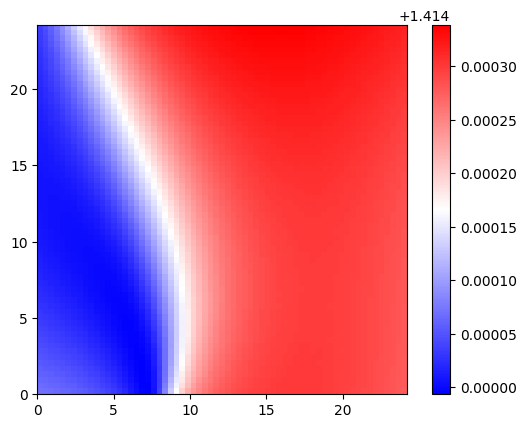

In [ ]:
# plt.imshow(zeeman.T, cmap="bwr", origin="lower", extent=[0, x.max()-a_t, 0, y.max()-a_t])
# plt.colorbar()  # Add colorbar

In [49]:
well_potential = V_l( lbda = 1.75)
theta = np.pi/4

F_z = 5 
electric_potential_ = electric_potential(F_z = F_z)

# Delta_map = np.zeros((N_t, N_t, 4))
zeeman = np.zeros((N_t, N_t)) 
g_tau_map = np.zeros((N_t, N_t,2)) 

k_op = np.zeros((N_z, N_z))
k_op += -np.diag(np.ones(N_z-1),-1 )
k_op += np.diag(np.ones(N_z-1),-1 ).T
k_op = k_op / 2/ d_z

for i, x0 in enumerate(x): 
    for j, y0 in enumerate(y): 

        gs, fes, gap = get_gs_fes(z_values, well_potential=well_potential, disorder=V_0000[i, j, :], electric_noise=0, electric_potential=electric_potential_)
        
        Delta_0000 = expectation_value((well_potential+ V_0000[i, j, :]) *np.exp((0-1j)*2*k_0*z_values), ground_state=gs)
        
        i_k_z_01 = np.vdot(gs.conj(), k_op @ fes)
        beta_10 =expectation_value_2(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = fes.conj(),ket=gs)
        g_tau = calculate_g_tau(i_k_z_01, beta_10, gap)
        
        # Delta_map[i, j, 0]+= Delta_0000[0]
        # Delta_map[i, j, 1]+= Delta_0000[1]
        
        
        # beta_00 =expectation_value(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = gs.conj(),ket=gs)
        g_tau_map[i, j, 0]+=g_tau[0]
        g_tau_map[i, j, 1]+=g_tau[1]
        
        zeeman[i, j] += calculate_Zeeman_splitting(theta, g_tau, Delta_0000)
        

0.00016320469598041145


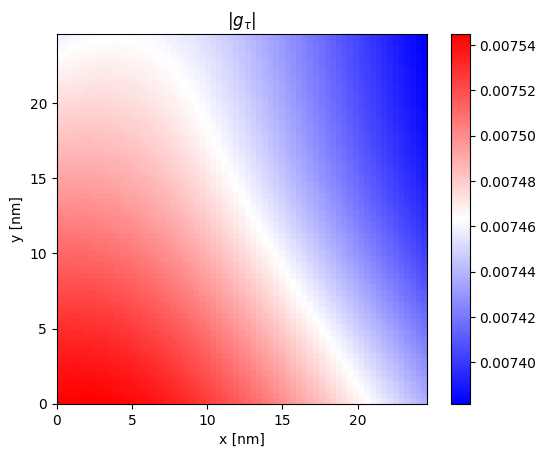

In [53]:
plt.imshow(g_tau_map[:, :, 0].T, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
plt.colorbar()  # Add colorbar
plt.title(r'$|g_\tau|$')
plt.xlabel("x [nm]")
plt.ylabel("y [nm]")
print(np.max(g_tau_map[:, :, 0])-np.min(g_tau_map[:, :, 0]))

Text(0, 0.5, 'y [nm]')

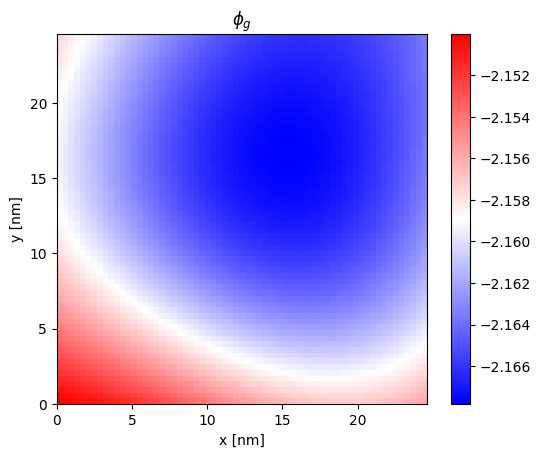

In [51]:
plt.imshow(g_tau_map[:, :, 1].T, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
plt.colorbar()  # Add colorbar
plt.title(r'$\phi_g$')
plt.xlabel("x [nm]")
plt.ylabel("y [nm]")

Text(0, 0.5, 'y [nm]')

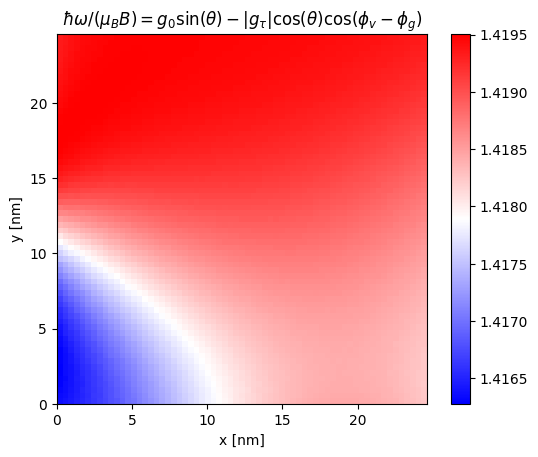

In [52]:
plt.imshow(zeeman.T, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
plt.colorbar()  # Add colorbar
plt.title(r'$\hbar \omega/(\mu_BB) = g_0 \sin(\theta) - |g_\tau|\cos(\theta)\cos(\phi_v-\phi_g)$')
plt.xlabel("x [nm]")
plt.ylabel("y [nm]")

In [54]:
well_potential = V_l( lbda = 1.75)
theta = np.pi/6

F_z = 5 
electric_potential_ = electric_potential(F_z = F_z)

# Delta_map = np.zeros((N_t, N_t, 4))
zeeman = np.zeros((N_t, N_t)) 
k_op = np.zeros((N_z, N_z))
k_op += -np.diag(np.ones(N_z-1),-1 )
k_op += np.diag(np.ones(N_z-1),-1 ).T
k_op = k_op / 2/ d_z

for i, x0 in enumerate(x): 
    for j, y0 in enumerate(y): 

        gs, fes, gap = get_gs_fes(z_values, well_potential=well_potential, disorder=V_0000[i, j, :], electric_noise=0, electric_potential=electric_potential_)
        
        Delta_0000 = expectation_value((well_potential+ V_0000[i, j, :]) *np.exp((0-1j)*2*k_0*z_values), ground_state=gs)
        
        i_k_z_01 = np.vdot(gs.conj(), k_op @ fes)
        beta_10 =expectation_value_2(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = fes.conj(),ket=gs)
        g_tau = calculate_g_tau(i_k_z_01, beta_10, gap)
        
        # Delta_map[i, j, 0]+= Delta_0000[0]
        # Delta_map[i, j, 1]+= Delta_0000[1]
        
        
        # beta_00 =expectation_value(beta_0*np.exp((0+1j)*2*k_1*z_values), bra = gs.conj(),ket=gs)
        
        zeeman[i, j] += calculate_Zeeman_splitting(theta, g_tau, Delta_0000)
        

Text(0, 0.5, 'y [nm]')

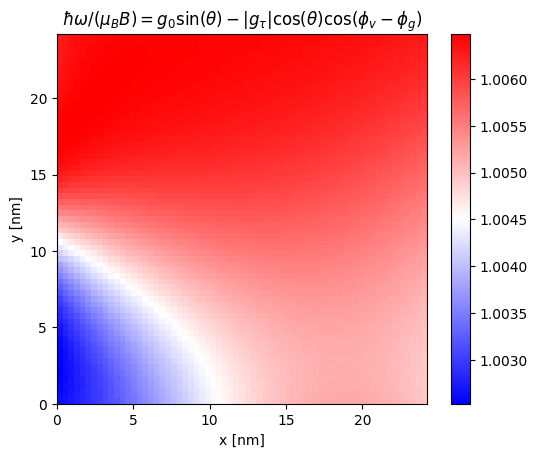

In [55]:
plt.imshow(zeeman.T, cmap="bwr", origin="lower", extent=[0, x.max()-a_t, 0, y.max()-a_t])
plt.colorbar()  # Add colorbar
plt.title(r'$\hbar \omega/(\mu_BB) = g_0 \sin(\theta) - |g_\tau|\cos(\theta)\cos(\phi_v-\phi_g)$')
plt.xlabel("x [nm]")
plt.ylabel("y [nm]")